In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

#pd.set_option('max_colwidth', 2000)
pd.options.display.max_rows = 500

In [2]:
%pwd

'C:\\Users\\Justin\\DATA_SCIENCE\\scrape_craigslist'

In [3]:
vehicle=pd.read_json('vehicle.json')

In [4]:
#Add feature columns and view dataframe
print('vehicle length:', len(vehicle))
print('vehicle type:', type(vehicle))
vehicle.insert(2,'Year',np.nan)
vehicle.insert(3,'Year_in_Title',np.nan)
vehicle.insert(4,'Make',np.nan)
vehicle.insert(5,'Model',np.nan)
vehicle.insert(6,'Trim',np.nan)
vehicle.insert(8,'LN_Price',np.nan)
vehicle.head(3)

vehicle length: 374
vehicle type: <class 'pandas.core.frame.DataFrame'>


,URL_Vehicle,Title,Year,Year_in_Title,Make,Model,Trim,Price,LN_Price,SubLoc,AttribDictionary,ImageDictionary
0,https://houston.craigslist.org/cto/d/houston-2...,2010 Honda Accord Coupe EX-L/1 Owner/Clean Title,NaN,NaN,NaN,NaN,NaN,$6750,NaN,None,{'0': '<span><b>2010 honda accord ex-l coupe</...,{'0': 'https://images.craigslist.org/00X0X_ibG...
1,https://houston.craigslist.org/cto/d/spring-19...,1999 Honda Prelude,NaN,NaN,NaN,NaN,NaN,$4500,NaN,(Spring),{'0': '<span><b>1999 Honda Prelude</b></span>'...,{'0': 'https://images.craigslist.org/00E0E_dZp...
2,https://houston.craigslist.org/cto/d/hempstead...,1998 Honda Accord OBO,NaN,NaN,NaN,NaN,NaN,$2200,NaN,(Hempstead),"{'0': '<span><b>1998 Honda Accord</b></span>',...",{'0': 'https://images.craigslist.org/00Q0Q_a84...


In [5]:
vehicle.loc[0:3, 'AttribDictionary']

0    {'0': '<span><b>2010 honda accord ex-l coupe</...
1    {'0': '<span><b>1999 Honda Prelude</b></span>'...
2    {'0': '<span><b>1998 Honda Accord</b></span>',...
3    {'0': '<span><b>2017 HONDA CIVIC EX</b></span>...
Name: AttribDictionary, dtype: object

In [6]:
#Build Year column from AttribDictionary and verify numeric format. 
yrList=[]
for idx in vehicle.index:
    m = re.search('(\d+)', vehicle.loc[idx, 'AttribDictionary']['0'])  #re.search(pattern, string) gets first match
    yrList.append(m.group(1))  #group(1) returns first parenthesized subgroup
vehicle['Year'] = yrList    
vehicle['Year'] = vehicle['Year'].astype('float').astype('Int64')

assert vehicle['Year'].dtypes == 'Int64',  "Year must be a nullable integer."
assert len(vehicle[vehicle['Year'].isna()]) == 0, "Year cannot have NAs."

In [7]:
#Extract RawMake col from AttribDictionary.
rawMakeList=[]

for idx in vehicle.index:
    m = re.search('<b>(.+)</b>', vehicle.loc[idx, 'AttribDictionary']['0']) #re.search(pattern, string) gets first match
    if m is not None:
        rawMakeList.append(m.group(1).lower())
    else:
        print('Missing Make/Model index:', idx)
        rawMakeList.append('None')
                 
vehicle['RawMake'] = rawMakeList

In [8]:
#Extract Make col from RawMake col.

#Regex patter
patt='\d*\s{0,2}\d+\s{1,2}(\w+)\s{0,2}(\w*-?[a-z]?)\s{0,2}(\w*-?[a-z]?)'

#Regex patter in verbose (re.X) format.
pattVerbose=re.compile(r'''\d*\s{0,2} #0 or more digits and 0-2 spaces
                 \d+\s{1,2}     #1 or more digits and 1-2 spaces
                 (\w+)          #1 or more words
                 \s{0,2}        #0-2 whitespaces
                 (\w*-?[a-z]?)  #0 or more words, 0 or 1 "-", 0 or 1 letter a-z
                 \s{0,2}        #0-2 whitespaces
                 (\w*-?[a-z]?)  #0 or more words, 0 or 1 "-", 0 or 1 letter a-z
                 ''', re.X)

makeList=[]
for idx in vehicle.index:
    m = re.search(pattVerbose, vehicle.loc[idx, 'RawMake']) #re.search(pattern, string) gets first match
    if m is not None:
        makeList.append([m.group(1).lower(), m.group(2).lower(), m.group(3).lower()])
    else:
        print('Missing Make/Model index:', idx)
        makeList.append('None')
                 
vehicle['Make']=[item[0] for item in makeList]
vehicle['Model']=[item[1] for item in makeList]
vehicle['Trim']=[item[2] for item in makeList]

In [9]:
vehicle[['RawMake','Make','Model','Trim']].head(400)

,RawMake,Make,Model,Trim
0,2010 honda accord ex-l coupe,honda,accord,ex-l
1,1999 honda prelude,honda,prelude,
2,1998 honda accord,honda,accord,
3,2017 honda civic ex,honda,civic,ex
4,2006 honda odyssey,honda,odyssey,
5,2010 honda accord sedan,honda,accord,sedan
6,2017 honda civic ex,honda,civic,ex
7,2018 honda civic ex,honda,civic,ex
8,2003 honda accord,honda,accord,
9,2016 honda accord sport,honda,accord,sport


In [10]:
#Price - remove any $ and cast as float.
vehicle['Price'] = vehicle['Price'].str.replace('$','')
vehicle['Price'] = vehicle['Price'].astype('float')
assert len(vehicle[vehicle['Price'].isna()]) == 0, "Price cannot have NAs."

In [11]:
from scipy import stats
from scipy.stats import norm

def normalize_feature(df, bad_feature):
    
    #Make histogram & normal probability plot
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(df[bad_feature], color='r', fit=stats.norm, ax=ax1)
    ax1.set_title(f'{bad_feature} Histogram - Not Normal Distribution')
    res=stats.probplot(df[bad_feature], dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')

    #Normalize with log (x+1).  Log of skewed feature: log e(feature+1)=normFeat
    #Exponential equation to undo normpr: e^normFeat-1=feature
    log_feat=np.log(df[bad_feature]+1)
        
    #Plots after normalization
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(log_feat, color='g', fit=norm, ax=ax1)
    ax1.set_title(bad_feature+' Histogram - Normal Distribution')
    res=stats.probplot(log_feat, dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')
    return log_feat

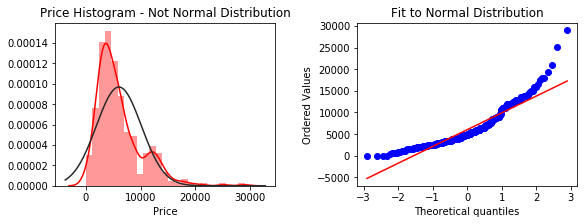

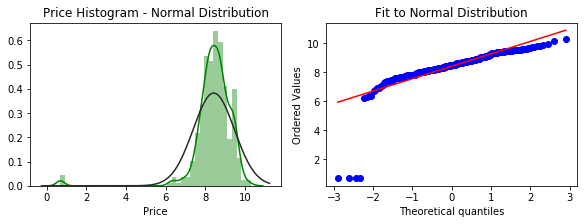

In [12]:
vehicle['LN_Price'] = normalize_feature(df=vehicle, bad_feature='Price')

In [13]:
vehicle.head()

,URL_Vehicle,Title,Year,Year_in_Title,Make,Model,Trim,Price,LN_Price,SubLoc,AttribDictionary,ImageDictionary,RawMake
0,https://houston.craigslist.org/cto/d/houston-2...,2010 Honda Accord Coupe EX-L/1 Owner/Clean Title,2010,NaN,honda,accord,ex-l,6750.0,8.817446,None,{'0': '<span><b>2010 honda accord ex-l coupe</...,{'0': 'https://images.craigslist.org/00X0X_ibG...,2010 honda accord ex-l coupe
1,https://houston.craigslist.org/cto/d/spring-19...,1999 Honda Prelude,1999,NaN,honda,prelude,,4500.0,8.412055,(Spring),{'0': '<span><b>1999 Honda Prelude</b></span>'...,{'0': 'https://images.craigslist.org/00E0E_dZp...,1999 honda prelude
2,https://houston.craigslist.org/cto/d/hempstead...,1998 Honda Accord OBO,1998,NaN,honda,accord,,2200.0,7.696667,(Hempstead),"{'0': '<span><b>1998 Honda Accord</b></span>',...",{'0': 'https://images.craigslist.org/00Q0Q_a84...,1998 honda accord
3,https://houston.craigslist.org/cto/d/south-hou...,2017 HONDA CIVIC EX,2017,NaN,honda,civic,ex,12900.0,9.465060,None,{'0': '<span><b>2017 HONDA CIVIC EX</b></span>...,{'0': 'https://images.craigslist.org/00j0j_6Dx...,2017 honda civic ex
4,https://houston.craigslist.org/cto/d/el-paso-2...,2006 HONDA ODYSSEY ORIGINAL OWNER TRACTION CON...,2006,NaN,honda,odyssey,,1500.0,7.313887,None,{'0': '<span><b>2006 Honda Odyssey</b></span>'...,{'0': 'https://images.craigslist.org/00z0z_8jK...,2006 honda odyssey


In [14]:
#Show outstanding null values in dataframe
vehicle.isna().sum()

URL_Vehicle           0
Title                 0
Year                  0
Year_in_Title       374
Make                  0
Model                 0
Trim                  0
Price                 0
LN_Price              0
SubLoc               84
AttribDictionary      0
ImageDictionary       0
RawMake               0
dtype: int64

In [15]:
#*********************************UNUSED CODE**************************************

# #Extract Year_in_Title from vehicle Title and save off column - pandas.Series.str.extract

# patt='(\d+)'
# vehicle['Year_in_Title'] = vehicle['Title'].str.extract(patt).replace(np.nan, 'None')

# def fix_2digit(row):
#     if len(row) == 4 or row == 'None':
#         return row
#     elif row in [str(dig).zfill(2) for dig in range(0,21)]:    #Assume 00 - 20 is 2000s
#         return '20' + row
#     elif row in [str(dig).zfill(2) for dig in range(21,100)]:  #Assume 21 - 99 is 1900s
#         return '19' + row
#     else:
#         return 'None'
    
# vehicle['Year_in_Title'] = vehicle['Year_in_Title'].apply(fix_2digit)
# vehicle['Year_in_Title'] = vehicle['Year_in_Title'].replace('None',np.nan).astype('float').astype('Int64')
# vehicle['Year_in_Title'].value_counts(dropna=False)

#re.search('<b>(\d*\s{0,2})(\d+\s{1,2}\w+\s{1,2}\w+\s{0,2}\w*)</b>', vehicle.loc[55, 'AttribDictionary']['0']).group(0)